# Color Image Processing

In [237]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from matplotlib import pyplot

In [238]:
os.getcwd()

'/Users/liyutai/GitHub/AI-Project'

In [239]:
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [270]:
os.chdir('/Users/liyutai/GitHub/AI-Project/MMAFEDB/valid')

In [271]:
train_path = os.getcwd()
train_path

'/Users/liyutai/GitHub/AI-Project/MMAFEDB/valid'

In [272]:
def transfer(label_list):
    dataframe_d = []
    for label in label_list:
        c_path = train_path + "/" + label
#         print(c_path)
        for image_name in os.listdir(c_path):
            if image_name.endswith(".jpg"):
                img_path = c_path + "/" + image_name
                img = Image.open(img_path).convert('L')
#                 img = img.resize(48, 48)
                img_array = np.asarray(img)
                dataframe_d.append([image_name, img_array, label])
                
                
    return(dataframe_d)

In [273]:
test_label = ['angry']
dataframe = transfer(labels)

In [274]:
df = pd.DataFrame(dataframe, columns = ['img_name', "img_array", "label"])
df.head()

,img_name,img_array,label
0,1041Exp0angry_expression_232.jpg,"[[6, 148, 218, 181, 85, 122, 102, 52, 35, 27, ...",angry
1,Angry.31888.jpg,"[[140, 143, 98, 33, 10, 21, 23, 16, 18, 19, 19...",angry
2,111Exp0angry_actor_700.jpg,"[[10, 7, 15, 11, 13, 11, 12, 7, 21, 9, 35, 111...",angry
3,991Exp0angry_expression_108.jpg,"[[190, 166, 154, 155, 151, 143, 135, 125, 137,...",angry
4,Angry.31877.jpg,"[[247, 206, 120, 107, 89, 89, 104, 129, 123, 1...",angry


In [275]:
df["label"].value_counts()

neutral     5839
happy       5475
sad         2236
surprise    1474
angry       1017
fear         659
disgust      656
Name: label, dtype: int64

In [276]:
test_ary = df["img_array"][1]
pilImage = Image.fromarray(test_ary)
print(pilImage)

<PIL.Image.Image image mode=L size=48x48 at 0x7FE1EE9D7040>


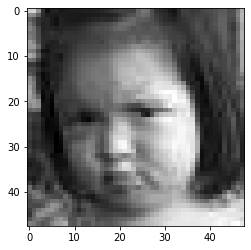

In [277]:
ax = pyplot.subplot()
ax.imshow(test_ary, cmap='gray')

In [218]:
df["img_array"][0].shape

(48, 48)

In [210]:
# for x in range(len(df)):
#     df['img_array'][x] = df["img_array"][x].flatten()

In [180]:
# df["img_array"][0].shap

(2304,)

In [278]:
os.chdir("/Users/liyutai/GitHub/AI-Project")
df.to_json("color_valid.json")

In [279]:
df3 = pd.read_json("color_valid.json")
df3.head()

,img_name,img_array,label
0,1041Exp0angry_expression_232.jpg,"[[6, 148, 218, 181, 85, 122, 102, 52, 35, 27, ...",angry
1,Angry.31888.jpg,"[[140, 143, 98, 33, 10, 21, 23, 16, 18, 19, 19...",angry
2,111Exp0angry_actor_700.jpg,"[[10, 7, 15, 11, 13, 11, 12, 7, 21, 9, 35, 111...",angry
3,991Exp0angry_expression_108.jpg,"[[190, 166, 154, 155, 151, 143, 135, 125, 137,...",angry
4,Angry.31877.jpg,"[[247, 206, 120, 107, 89, 89, 104, 129, 123, 1...",angry


In [215]:
df2 = pd.read_csv("color.csv")

In [217]:
# (df2["img_array"][0].replace("\n", ","))
df2["img_array"][0]

'[[ 33  35  35 ...  40  37  34]\n [ 38  31  30 ...  39  38  35]\n [ 36  30  37 ...  37  40  37]\n ...\n [ 42  42  42 ...  90  40  21]\n [ 42  42  42 ... 117  75  18]\n [ 42  42  42 ... 147 110  23]]'

In [236]:
np.array(df3['img_array'][0].values.tolist())

AttributeError: 'list' object has no attribute 'values'